# Portfolio Optimization of Volatile Assets (with Python)

Portfolio optimization in finance is the technique of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

# Section 1: Getting started

## 1. What is a portfolio?

An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.

For example, if you have investments in 3 companies, say, Google, Amazon and Tesla, then these 3 companies make up your investment portfolio.

But how do you invest in a company? You do so by purchasing assets of that company.

__What are assets, returns and risk?__

Assets are of various kinds. An asset is what you would purchase if you want to invest in a company.

These include, but are not limited to:

- Bonds
- Stocks
- Cash
- Real Estate
  
Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. However, the profit may not be the same for each investment you make.

This profit is what we call returns.

For example, you will get returns from stocks when it’s market value goes up and similarly you will get returns from cash in form of interest.

But what if the company whose stocks you have purchased goes bankrupt?

This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.

This is what is called __risk of investment.__

Another aspect of risk is the _fluctuations_ in the asset value. For certain assets, its value is highly volatile, that is, the value increases when the market goes up, and drops accordingly. Whereas certain other assets, like bonds and certain steady stocks, are relatively more resistant to market conditions, but may give lesser returns compared to high risk ones.

A good portfolio is one which gives us __maximum return on our investment for minimum risk__, as discussed earlier.

The next question is, how do we decide out of an infinite possible combinations for portfolios, the one which is optimum?

## 2. Modern Portfolio Theory (MPT)

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

It was formulated by H. Markowitz and while it is not the only optimization technique known, it is the most widely used.

MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.
So, what is the MPT all about?

MPT encourages diversification of assets. __It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.__

This is the crux of the __Modern Portfolio Theory (MPT)__

## 3. What is Efficient Frontier?

We know every asset in a portfolio has its own rate expected returns and risks. It is possible to create multiple combinations of assets that can provide high returns for a pre-defined risk level.

Likewise, there can be multiple portfolios that give lowest risk for a pre-defined expected return.

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

Portfolios that lie outside the efficient frontier are sub-optimal because they do not provide either enough return for the level of risk or have a higher risk for the defined rate of return.

We will revisit this with an example again.

Now that you understand the term of portfolio optimization, let’s see how its actually implemented.

# SECTION 2: Understanding with simpler example

## 4. Data Pull
There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.
We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

__Step 1:__ Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [1]:
 !pip install pandas-datareader
 !pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Import the data

In [8]:
import yfinance as yf
data = yf.download(['TSLA', 'MSFT'], start='2018-01-01', end='2023-12-31', group_by='ticker', auto_adjust=True)

data.head()

[*********************100%***********************]  2 of 2 completed


Ticker           TSLA                                                   MSFT  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2018-01-02  20.799999  21.474001  20.733334  21.368668   65283000  79.494655   
2018-01-03  21.400000  21.683332  21.036667  21.150000   67822500  79.430049   
2018-01-04  20.858000  21.236668  20.378668  20.974667  149194500  79.919234   
2018-01-05  21.108000  21.149332  20.799999  21.105333   68868000  80.906790   
2018-01-08  21.066668  22.468000  21.033333  22.427334  147891000  81.405173   

Ticker                                                 
Price            High        Low      Close    Volume  
Date                                                   
2018-01-02  79.660788  78.913192  79.328522  22483800  
2018-01-03  79.845385  79.346985  79.697708  26061400  
2018-01-04  80.906809  79.900777  80.399178  21912000  
2018-01-05  81.599011  80.694505  81.395958  23407100  
2018-01-08  81.755903  80.851398  81.479012  22113000

__Keep only 'Adj Close'__

In [11]:
adj_close = data['TSLA']['Close']

## 5. Why Log of Perct Change?

Calculate percentage change in stock prices

Next, we calculate the percentage change in stock prices of tesla everyday. You will notice that that we take the log of percentage change.

But take log?

The reason for this is that log of the returns is time additive.



That is,

If r13 is the returns for time between t3 and t1.

- r12 is the returns between t1 a- nd t2 and
- r23 is the returns between t2 and t3.

Then, log(r13) = log(r12) + log(r23)

For example:

If p1 = 100, p2 = 110 and p3 = 120,
where p1 is price of stock in time 1

Then:

log(r12) = ln(p2/p1) = `ln`(110/100) = 9.53%,

log(r23) = `ln`(120/110) = 8.7% and

log(r13) = log(r12) + log(r23) = 9.53 + 8.7 = 18.23%, which` is same as ln(120/100).

This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is not true if you simply compute percentage change.

It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.

In [12]:
# Log of percentage change
tesla = data['MSFT'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000813,0.002315,0.005482,0.004643,0.147660
2018-01-04,0.006140,0.013206,0.006955,0.008763,-0.173421
2018-01-05,0.012281,0.008519,0.009885,0.012322,0.066005
2018-01-08,0.006141,0.001921,0.001942,0.001020,-0.056874


In [13]:
# Variance
var_tesla = tesla.var()
var_tesla

,0
Price,
Open,0.000312
High,0.000218
Low,0.000262
Close,0.000360
Volume,0.082984


__Similarly for MSFT__


In [14]:
# Log of Percentage change for Facebook
msft = data['MSFT'].pct_change().apply(lambda x: np.log(1+x))
msft.head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000813,0.002315,0.005482,0.004643,0.147660
2018-01-04,0.006140,0.013206,0.006955,0.008763,-0.173421
2018-01-05,0.012281,0.008519,0.009885,0.012322,0.066005
2018-01-08,0.006141,0.001921,0.001942,0.001020,-0.056874


## 6. Variance, Volatility

__Variance__

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

It can be calculated for each company by using built in .var() function. Under the hood, the formula implemented by this function is given by:

<img src="variance_formula.png" height=100 width=300>

In [15]:
# Variance
var_msft = msft.var()
var_msft

,0
Price,
Open,0.000312
High,0.000218
Low,0.000262
Close,0.000360
Volume,0.082984


__Volatility__


Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of varianc


But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.e.

In [16]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
msft_vol = np.sqrt(var_msft * 250)
tesla_vol, msft_vol

(Price
 Open      0.279344
 High      0.233366
 Low       0.255891
 Close     0.300108
 Volume    4.554768
 dtype: float64,
 Price
 Open      0.279344
 High      0.233366
 Low       0.255891
 Close     0.300108
 Volume    4.554768
 dtype: float64)

__Plot volatility__

<Axes: xlabel='Ticker,Price'>

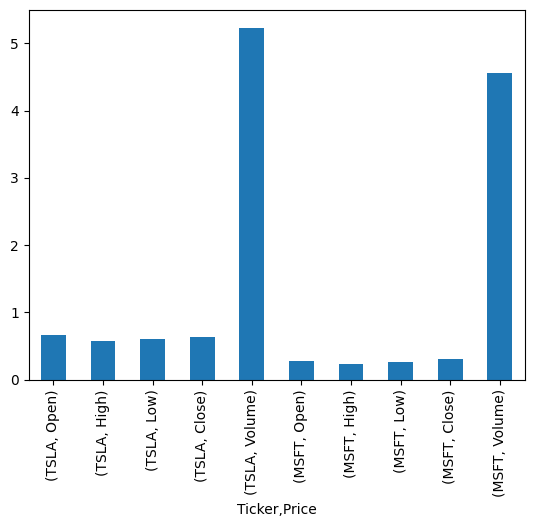

In [17]:
# Volatility of both stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

__Covariance__

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

We can calculate the covariance of Tesla and Facebook by using the .cov() function.

In [18]:
# Log of Percentage change
data_pctchg = data.pct_change().apply(lambda x: np.log(1+x))
data_pctchg.head()

Ticker          TSLA                                              MSFT  \
Price           Open      High       Low     Close    Volume      Open   
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.028438  0.009701  0.014524 -0.010286  0.038162 -0.000813   
2018-01-04 -0.025653 -0.020815 -0.031778 -0.008325  0.788357  0.006140   
2018-01-05  0.011915 -0.004121  0.020464  0.006210 -0.773059  0.012281   
2018-01-08 -0.001960  0.060484  0.011156  0.060755  0.764284  0.006141   

Ticker                                              
Price           High       Low     Close    Volume  
Date                                                
2018-01-02       NaN       NaN       NaN       NaN  
2018-01-03  0.002315  0.005482  0.004643  0.147660  
2018-01-04  0.013206  0.006955  0.008763 -0.173421  
2018-01-05  0.008519  0.009885  0.012322  0.066005  
2018-01-08  0.001921  0.001942  0.001020 -0.056874

In [20]:
# Covariance
data_pctchg['TSLA']['Close'].cov(data_pctchg['MSFT']['Close'])

np.float64(0.00034349789703281165)

__Correlation__

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management, computed as the correlation coefficient, which has a value that must fall between -1.0 and +1.0.

You can think of correlation as a scaled version of covariance, where the values are restricted to lie between -1 and +1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.
This is calculated using the .corr() function.

In [22]:
data_pctchg['TSLA']['Close'].corr(data_pctchg['MSFT']['Close'])

np.float64(0.4511299615410076)


## 7. Expected Returns

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For an yearly expected return value, you will need to resample the data year-wise, as you will see further.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

First, let’s compute the log of percentage change.

In [23]:
data_pctchg = data.pct_change().apply(lambda x: np.log(1+x))
data_pctchg.head()

Ticker          TSLA                                              MSFT  \
Price           Open      High       Low     Close    Volume      Open   
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.028438  0.009701  0.014524 -0.010286  0.038162 -0.000813   
2018-01-04 -0.025653 -0.020815 -0.031778 -0.008325  0.788357  0.006140   
2018-01-05  0.011915 -0.004121  0.020464  0.006210 -0.773059  0.012281   
2018-01-08 -0.001960  0.060484  0.011156  0.060755  0.764284  0.006141   

Ticker                                              
Price           High       Low     Close    Volume  
Date                                                
2018-01-02       NaN       NaN       NaN       NaN  
2018-01-03  0.002315  0.005482  0.004643  0.147660  
2018-01-04  0.013206  0.006955  0.008763 -0.173421  
2018-01-05  0.008519  0.009885  0.012322  0.066005  
2018-01-08  0.001921  0.001942  0.001020 -0.056874

## Weights

Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

In [24]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = data_pctchg.mean()
e_r_ind

Ticker  Price 
TSLA    Open      0.001662
        High      0.001641
        Low       0.001644
        Close     0.001627
        Volume    0.000289
MSFT    Open      0.001023
        High      0.001024
        Low       0.001023
        Close     0.001024
        Volume   -0.000121
dtype: float64

The total expected return for a portfolio is given by:

$$E(R_p) = w_1*E(R_1) + w_2*E(R_2) + . . + w_n*E(R_n)$$

__Total Expected Returns__ for the assigned weights.


In [26]:
# Total expected return
e_r = (e_r_ind['TSLA']['Close'] * w[0]) + (e_r_ind['MSFT']['Close'] * w[1])
e_r

np.float64(0.0011449175520223344)

# SECTION 3: Building Optimal Portfolio

## 8. Problem Statement

Now that you have gone through the building blocks of portfolio optimization, it is time to create an optimal portfolio using the same concepts.

We will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years.

What is the optimal allocation between these assets?

Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

In [27]:
# Import data\
df = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'],
                start='2015-01-01', end='2019-12-31')
df.head()

/tmp/ipython-input-106808917.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['AAPL', 'NKE', 'GOOGL', 'AMZN'],
[*********************100%***********************]  4 of 4 completed


Price           Close                                      High           \
Ticker           AAPL     AMZN      GOOGL        NKE       AAPL     AMZN   
Date                                                                       
2015-01-02  24.288580  15.4260  26.319653  41.862122  24.757334  15.7375   
2015-01-05  23.604338  15.1095  25.818157  41.188126  24.137518  15.4190   
2015-01-06  23.606550  14.7645  25.180981  40.945847  23.866475  15.1500   
2015-01-07  23.937569  14.9210  25.106924  41.791645  24.037539  15.0640   
2015-01-08  24.857307  15.0230  25.194401  42.756359  24.915069  15.1570   

Price                                   Low                                 \
Ticker          GOOGL        NKE       AAPL     AMZN      GOOGL        NKE   
Date                                                                         
2015-01-02  26.630290  42.707909  23.848706  15.3480  26.236649  41.456849   
2015-01-05  26.242115  41.650667  23.417725  15.0425  25.733168  41.025134   
2015-01-06  25.905136  41.474466  23.244431  14.6190  25.126805  40.558195   
2015-01-07  25.422034  41.981067  23.704302  14.7665  25.032372  41.011932   
2015-01-08  25.223724  42.773980  24.148621  14.8055  24.603443  42.122020   

Price            Open                                    Volume            \
Ticker           AAPL     AMZN      GOOGL        NKE       AAPL      AMZN   
Date                                                                        
2015-01-02  24.746226  15.6290  26.471242  42.531706  212818400  55664000   
2015-01-05  24.057541  15.3505  26.200365  41.633046  257142000  55484000   
2015-01-06  23.668754  15.1120  25.869848  41.359932  263188400  70380000   
2015-01-07  23.815381  14.8750  25.395196  41.236595  160423600  52806000   
2015-01-08  24.266367  15.0160  24.926010  42.139641  237458000  61768000   

Price                          
Ticker         GOOGL      NKE  
Date                           
2015-01-02  26480000  4985800  
2015-01-05  41182000  6889200  
2015-01-06  54456000  7576000  
2015-01-07  46918000  7256000  
2015-01-08  73054000  5978200

Keep only 'Adj Close'

In [29]:
df = df['Close']
df.head()

Ticker,AAPL,AMZN,GOOGL,NKE
Date,,,,
2015-01-02,24.288580,15.4260,26.319653,41.862122
2015-01-05,23.604338,15.1095,25.818157,41.188126
2015-01-06,23.606550,14.7645,25.180981,40.945847
2015-01-07,23.937569,14.9210,25.106924,41.791645
2015-01-08,24.857307,15.0230,25.194401,42.756359


## 9. Covariance and Correlation Matrix


The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [30]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,AMZN,GOOGL,NKE
Ticker,,,,
AAPL,0.000246,0.000142,0.000122,0.000084
AMZN,0.000142,0.000334,0.000176,0.000092
GOOGL,0.000122,0.000176,0.000222,0.000085
NKE,0.000084,0.000092,0.000085,0.000219


The covariance between Apple and Apple, or Nike and Nike is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.

- A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

- A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

- A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [31]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Ticker,AAPL,AMZN,GOOGL,NKE
Ticker,,,,
AAPL,1.000000,0.496661,0.524875,0.360850
AMZN,0.496661,1.000000,0.647941,0.341553
GOOGL,0.524875,0.647941,1.000000,0.387465
NKE,0.360850,0.341553,0.387465,1.000000


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## 10. Portfolio Variance

The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:


$$\Sigma^2(Rp) = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j)$$


Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [32]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1,
     'NKE': 0.2,
     'GOOGL': 0.5,
     'AMZN': 0.2}

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

np.float64(0.0001609211637177604)

Thus we have found the portfolio variance. But for truly optimizing the portfolio, we cant plug in random weights. We will need to calculate it according to what gives us maximum expected returns.

How will you find the portfolio expected return?

## 11. Portfolio expected returns

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [33]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er


/tmp/ipython-input-1394815154.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = df.resample('Y').last().pct_change().mean()


,0
Ticker,
AAPL,0.357854
AMZN,0.295745
GOOGL,0.155478
NKE,0.160666


Portfolio returns

In [34]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

np.float64(0.20480653602064608)

## 12. The Efficient Frontier


This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

The plot of efficient frontier looks something like thi
s:

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [35]:
# Volatility is given by the annual standard deviation.
# We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

,0
Ticker,
AAPL,0.247871
AMZN,0.288770
GOOGL,0.235375
NKE,0.233916


In [36]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Ticker,,
AAPL,0.357854,0.247871
AMZN,0.295745,0.288770
GOOGL,0.155478,0.235375
NKE,0.160666,0.233916


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

Next, to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.
We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [37]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [38]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
                                      # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [39]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [40]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,AMZN weight,GOOGL weight,NKE weight
0,0.211636,0.191908,0.115281,0.219614,0.275092,0.390013
1,0.262529,0.195205,0.392755,0.188614,0.204548,0.214083
2,0.195239,0.195453,0.068334,0.173713,0.456110,0.301842
3,0.224519,0.188792,0.301396,0.039116,0.166150,0.493339
4,0.243988,0.192121,0.257976,0.245453,0.135506,0.361065


You can see that there are a number of portfolios with different weights, returns and volatility. Plotting the returns and volatility from this dataframe will give us the efficient frontier for our portfolio.

<Axes: xlabel='Volatility', ylabel='Returns'>

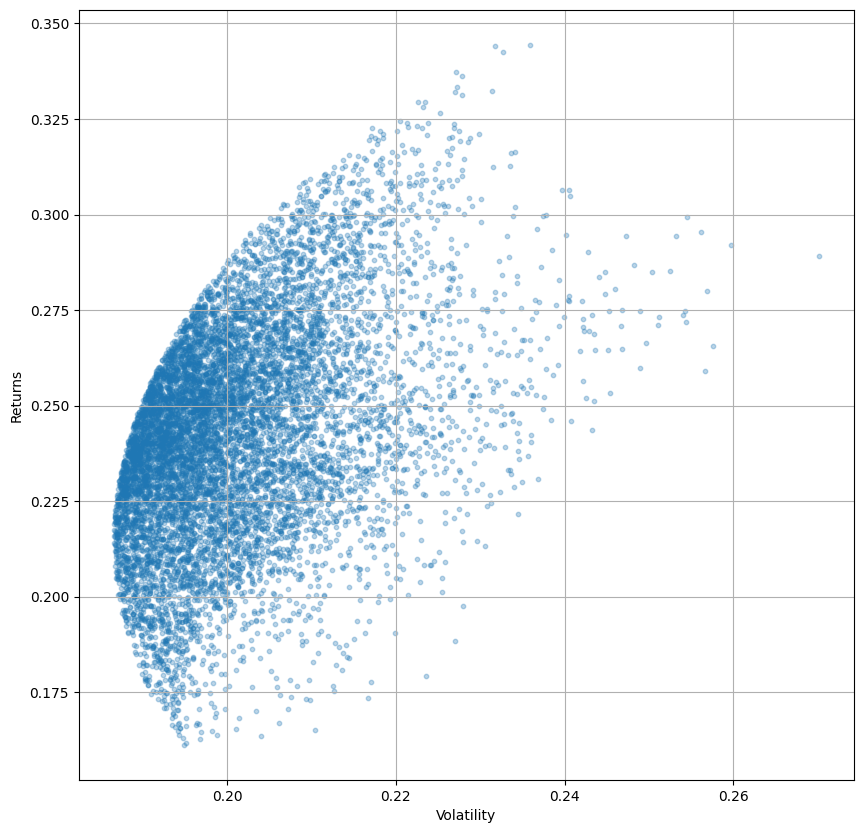

In [41]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns',
                        marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

__How to read the Efficient Frontier?__

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinatio point)


1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [42]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

,5186
Returns,0.217443
Volatility,0.186591
AAPL weight,0.267207
AMZN weight,0.041353
GOOGL weight,0.288789
NKE weight,0.402652


The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 41%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

/tmp/ipython-input-1792874120.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)


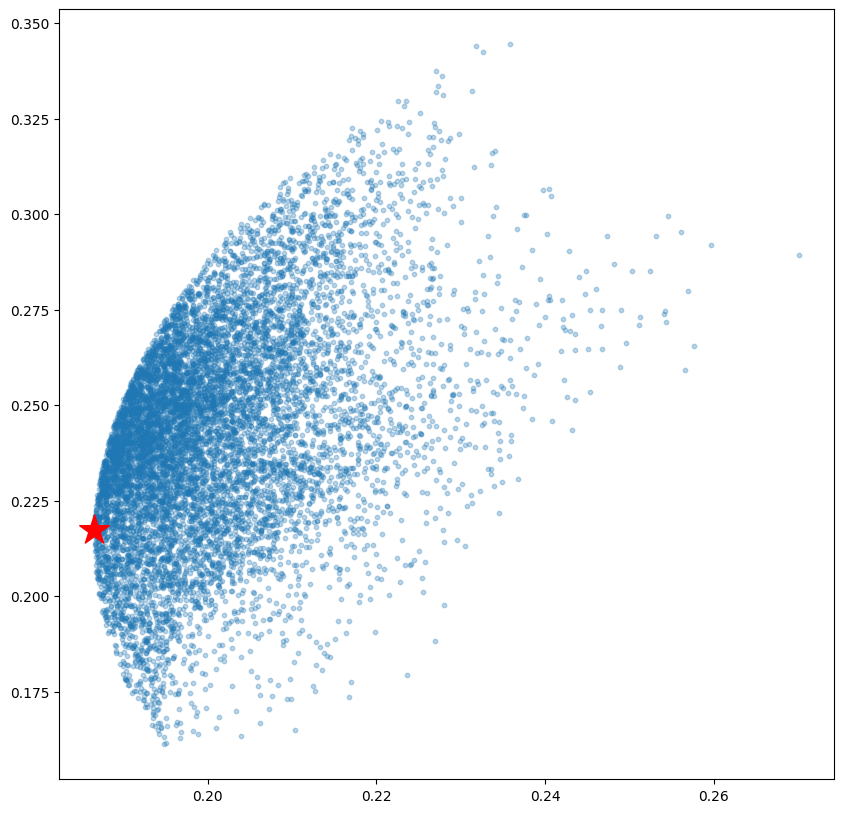

In [43]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter cal__led the Sharp__e Ratio.

## 14. Sharpe Ratio

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

## 15. Optimal Risky Portfolio

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.


In [44]:
# Finding the optimal portfolio
rf = 0.01 # riskfree factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

,8280
Returns,0.337323
Volatility,0.227070
AAPL weight,0.725991
AMZN weight,0.248192
GOOGL weight,0.004939
NKE weight,0.020878


You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.



/tmp/ipython-input-1083254237.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
/tmp/ipython-input-1083254237.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)


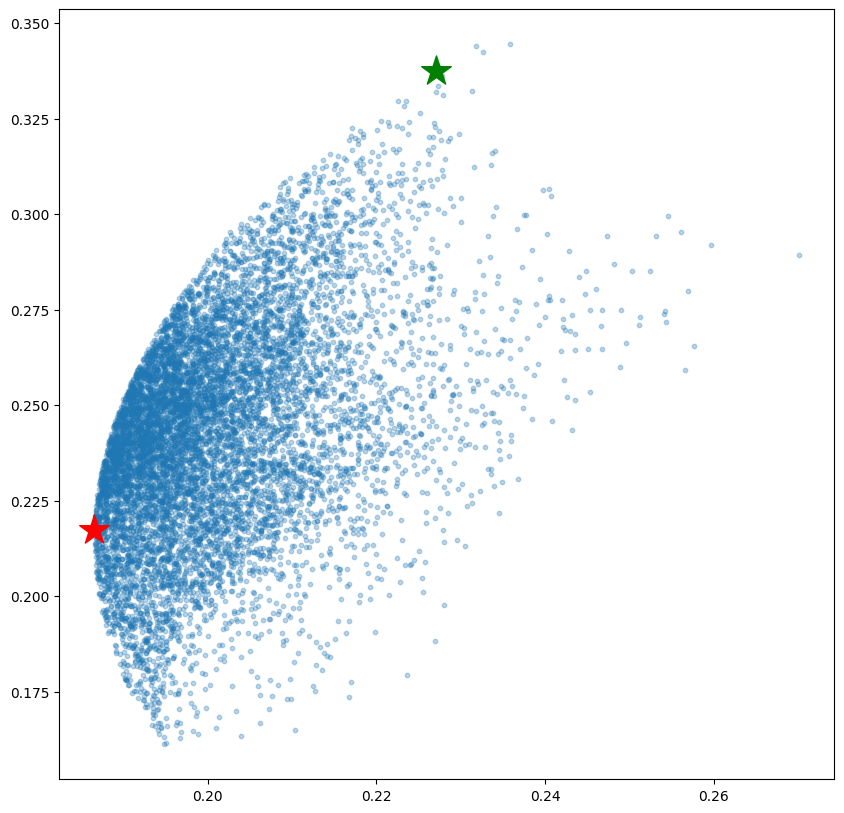

In [45]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

## 16. Optimizing with a Numerical Solver

While the method of generating random portfolios is a good way to visualize the efficient frontier, a more precise way to find the optimal portfolio is to use a numerical solver. We can use the `scipy.optimize.minimize` function to find the weights that maximize the Sharpe ratio. This will give us the most optimal portfolio for the given assets.

In [46]:
from scipy.optimize import minimize

def get_ret_vol_sr(weights):
    """
    Calculates the returns, volatility, and Sharpe ratio for a given set of weights.
    """
    weights = np.array(weights)
    ret = np.sum(ind_er * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sr = (ret - rf) / vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
    """
    Returns the negative of the Sharpe ratio.
    We need to minimize the negative of the Sharpe ratio to maximize the Sharpe ratio.
    """
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    """
    Ensures the sum of weights is 1.
    """
    return np.sum(weights) - 1

# Set up the optimization
cons = ({'type':'eq', 'fun': check_sum})
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
init_guess = [0.25, 0.25, 0.25, 0.25]

# Run the optimization
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

# Print the results
print('Optimal Weights:')
print(opt_results.x)
print('\nOptimal Portfolio:')
print(get_ret_vol_sr(opt_results.x))

Optimal Weights:
[0.74261993 0.19806431 0.         0.05931577]

Optimal Portfolio:
[3.33856464e-01 1.41689885e-02 2.28567101e+01]


## 17. The Capital Allocation Line (CAL)

The Capital Allocation Line (CAL) is a line created on a graph of all possible combinations of risk-free and risky assets. The y-axis represents the expected return, and the x-axis represents the risk (standard deviation). The CAL shows the return an investor can expect to receive by investing in a combination of the risk-free asset and the optimal risky portfolio.

The CAL is a straight line that starts at the risk-free rate and extends through the optimal risky portfolio. The slope of the CAL is the Sharpe ratio of the optimal risky portfolio. Any portfolio on the CAL represents the best possible risk-return trade-off. By combining the risk-free asset with the optimal risky portfolio, an investor can achieve a higher return for the same level of risk compared to any other portfolio on the efficient frontier.

/tmp/ipython-input-2744594260.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500, label='Minimum Volatility Portfolio')
/tmp/ipython-input-2744594260.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500, label='Optimal Risky Portfolio')
/tmp/ipython-input-2744594260.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

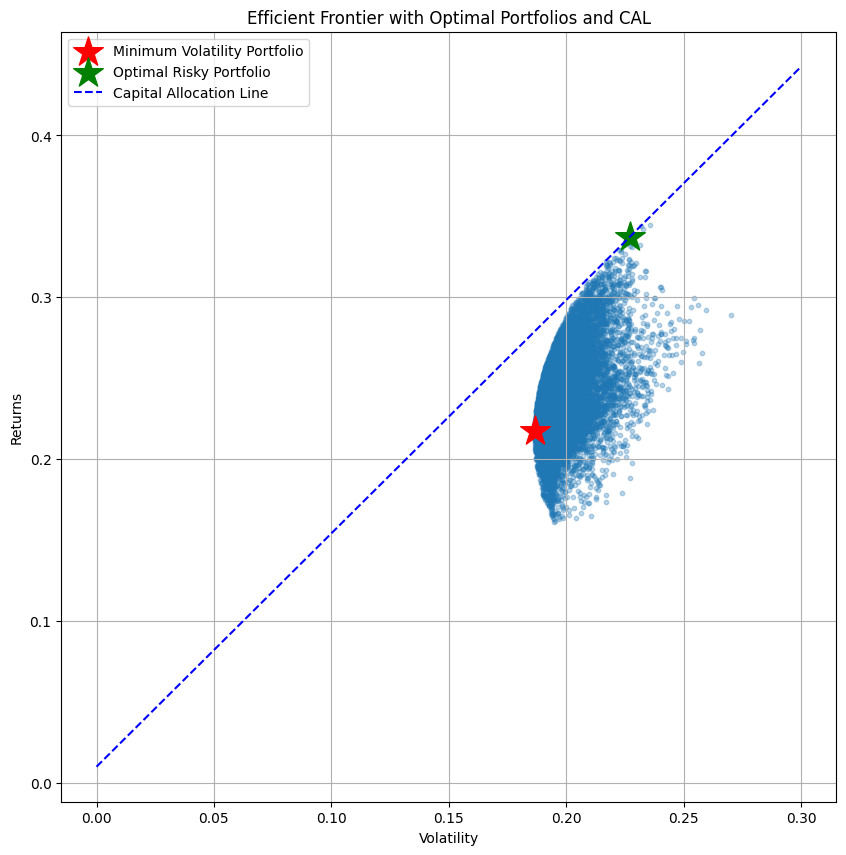

In [47]:
# Plotting optimal portfolio and CAL
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500, label='Minimum Volatility Portfolio')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500, label='Optimal Risky Portfolio')

# Plot the CAL
cal_x = np.linspace(0, 0.3, 100)
cal_y = rf + ((optimal_risky_port[0] - rf) / optimal_risky_port[1]) * cal_x
plt.plot(cal_x, cal_y, color='blue', linestyle='--', label='Capital Allocation Line')

plt.title('Efficient Frontier with Optimal Portfolios and CAL')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

## 18. Understanding the Final Graph

The graph above is the culmination of our portfolio optimization analysis. It visually represents the risk-return trade-offs of various portfolio combinations and guides us to the most efficient investment choices. Here's a breakdown of each component:

*   **The Blue Dotted Area (The Feasible Region):** Each blue dot represents a unique portfolio with a specific combination of weights for our chosen assets (Apple, Nike, Google, and Amazon). This entire area represents all possible portfolios we could create.

*   **The Efficient Frontier:** The curved left edge of the blue dotted area is the **Efficient Frontier**. Any portfolio that lies on this frontier is "efficient" because it offers the highest possible expected return for its level of risk (volatility). For any portfolio *inside* the feasible region, there is a portfolio on the efficient frontier that offers a better return for the same amount of risk.

*   **The Red Star (Minimum Volatility Portfolio):** This star marks the portfolio on the efficient frontier with the *absolute lowest risk*. An investor whose primary goal is capital preservation and minimizing risk would be most interested in this portfolio.

*   **The Green Star (Optimal Risky Portfolio):** This star represents the single best combination of our risky assets, also known as the **tangency portfolio**. It's the portfolio on the efficient frontier that maximizes the **Sharpe Ratio**. Because the Sharpe Ratio measures risk-adjusted return, this portfolio gives the most return for each unit of risk taken.

*   **The Blue Dashed Line (Capital Allocation Line - CAL):** This is the most critical part of the graph for a strategic investor. It represents the new, superior set of investment opportunities that arise when you combine the **Optimal Risky Portfolio** (the green star) with a **risk-free asset** (e.g., a U.S. Treasury bill).
    *   The CAL demonstrates that by mixing the optimal risky portfolio with a risk-free asset, an investor can achieve a better risk-return profile than by holding any other combination of risky assets alone.
    *   Portfolios on the CAL to the *left* of the green star represent a mix of the optimal risky portfolio and the risk-free asset.
    *   Portfolios on the CAL to the *right* of the green star represent leveraged positions, where an investor borrows at the risk-free rate to invest more than 100% of their capital into the optimal risky portfolio.

**In summary, the graph provides a roadmap for investment decisions by showing how to build the most efficient portfolio of risky assets and how to further enhance returns for a given risk level by strategically introducing a risk-free asset.**